In [1]:
import pandas as pd
import mio
import numpy as np
from matplotlib import pyplot as plt

In [2]:
tag = '1091'

In [3]:
sl_bui = (
    mio.read_raster(f'../25k_sl_bui/{tag}_bui_agl.bil')[0]
    .replace(0, np.nan)
)
sl_bui.shape

(12000, 17500)

In [4]:
rel = mio.read_raster(f'../25k_rel/rel_{tag}.bil')[0]
rel.shape

(12000, 17500)

In [5]:
veg = mio.read_raster(f'../25k_veg/veg_{tag}.bil')[0]
veg.shape

(12000, 17500)

In [6]:
bui = (sl_bui - rel).fillna(0)
bui.shape

(12000, 17500)

In [7]:
cla = np.maximum(2 * (bui>0).astype(int) , (veg>0).astype(int) )
cla.shape

(12000, 17500)

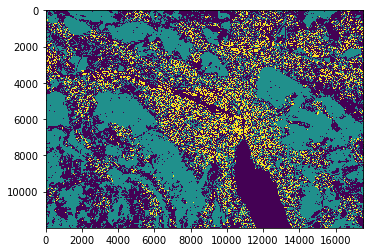

In [8]:
plt.imshow(cla)

In [9]:
cla.stack().value_counts()

0    95950373
1    93415837
2    20633790
dtype: int64

In [10]:
mio.write_raster(cla.astype('uint8'), f'25k_c_class/{tag}_c_class.bil')

CPLE_OpenFailedError: Attempt to create file '25k_c_class/1091_c_class.bil' failed.

In [ ]:
hei = np.maximum(bui , veg )

In [ ]:
mio.write_raster(hei.astype('uint8'), f'25k_c_height/{tag}_c_height.bil')